# Dirke na Čopovi

Ko sem na forum pisal [neko sporočilo o kolesarjenju pa Manhattnu](https://ucilnica.fri.uni-lj.si/mod/forum/discuss.php?d=32467#p61702), me je zgrabilo domoljubje in se sem odločil, da bi enkrat za spremembo pripravil tudi nalogo o kolesarjenju po Ljubljani.

V [videu o vedenju kolesarjev](https://www.youtube.com/watch?v=nmhrbzplGX4) nas je MOL poučil, da je osnovno opravilo ljubljanskih kolesark divjanje med pešci. (V tej nalogi bom govoril o kolesarkah, čeprav MOL v svojem videu kritizira samo kolesarje, kolesarke pa ignorira, kot da nismo v 21. stoletju.) To je popolnoma res! Tako se po zadnjih statistikah vede 98 % ljubljanskih kolesark in le 2 % takšno vedenje obsojata. (Obstaja možnost, da se je Angelca zmotila pri izpolnjevanju Excela in zamenjala celici, vendar to za našo nalogo niti ni pomembno.)

Kolesarke se torej dobivajo vsako sredo ob 16.00 na dirki, na katerih se spusté od Pošte do ciljne črte na Prešernovem trgu. Vsakič zabeležijo, kdo je zmagal in kdo so bile poraženke. Vrstni red poraženk ni zabeležen, prav tako nihče ne meri časov.

- Neko sredo so na dirki sodelovale Jana, Tina, Greta, Berta, Greta, Liza, Micka in Dani. Zmagala je Jana, torej lahko vemo, da je hitrejša od ostalih šestih.
- Neko drugo sredo so prišle Liza, Olga, Rezka in Vera. (Najavila se je tudi Fanči, vendar se je morala potem učiti za kolokvij iz Uvoda v računalništvo.) Zmagala je Liza.

Iz obeh dirk skupaj lahko sklepamo tudi, da je Jana hitrejša od Rezke, čeprav nista nikoli sodelovali na isti tekmi. Vemo namreč, da je Jana hitrejša od Lize, Liza pa od Rezke.

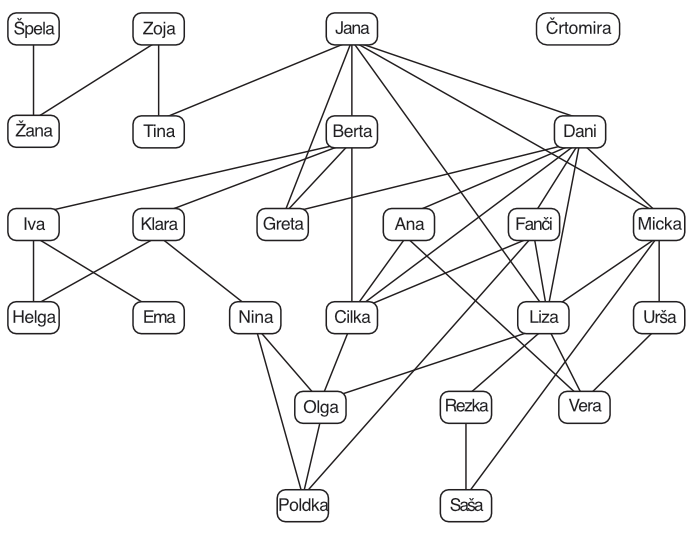

## Obvezna naloga

Nekatere od teh funkcij bodo skoraj gotovo rekurzivne (če si hočete dobro), nekatere pa skoraj gotovo ne bodo (če si hočete dobro).

### `hitrejsa(prva, druga, razmerja)`

- Napiši funkcijo `hitrejsa(prva, druga, razmerja)`, ki prejme imeni dveh kolesark in vrne `True`, če obstaja dokaz, da je `prva` hitrejša kot `druge`. Dokaz je lahko neposreden (pomerila sta se na isti dirki) ali posreden (kot opisujemo zgoraj). Če takšen dokaz ne obstaja (ali pa morda velja celo nasprotno), vrne `False`.

    Argument `razmerja` je slovar, katerega ključi so imena kolesark, pripadajoče vrednosti pa imena tistih, od katerih je ta kolesrka preverjeno hitrejša. Tako ključu "Ana" pripada množica `{"Tina", "Berta", "Dani", "Greta", "Liza", "Micka"}`. Kot ključi nastopajo vse kolesarke, tudi tiste, ki niso hitrejše od nikogar. V testih se bo pojavljal slovar, ki predstavlja stanje na sliki, pa tudi drugačni slovarji.

    Klica `hitrejsa("Berta", "Greta", razmerja)` in `hitrejsa("Berta", "Poldka", razmerja)` vrneta `True`, klica `hitrejsa("Berta", "Jana", razmerja)` in `hitrejsa("Berta", "Vera", razmerja)` pa `False`.

#### Rešitev

Na predavanjih smo se igrali z rodbino in se spraševali, ali je v rodbini osebe `prva` kakšna oseba z imenom `druga`. Tole je podobno, samo da nihče ni hitrejši od sebe (česar testi sicer ne preverjajo).

Pravilna rešitev je torej, da je `prva` hitrejša kot `druga`, če jo je kdaj premagala ali pa je med tistimi, ki jih je premagala `prva` tudi kakšna `tretja` oseba, ki je hitrejša kot `druga`.

In [1]:
def hitrejsa(prva, druga, razmerja):
    if druga in razmerja[prva]:
        return True
    for tretja in razmerja[prva]:
        if hitrejsa(tretja, druga, razmerja):
            return True
    return False

Če poznamo `any` in generatorje pa

In [2]:
def hitrejsa(prva, druga, razmerja):
    return druga in razmerja[prva] \
        or any(hitrejsa(tretja, druga, razmerja)
               for tretja in razmerja[prva])

Sovražnik rekurzije pa se rekurziji izogne s postopkom, ki mu boste v drugem letniku rekli *iskanje v širino*:

In [ ]:
def hitrejsa(prva, druga, razmerja):
    pocasnejsi = list(razmerja[prva])
    for kolesar in pocasnejsi:
        if kolesar == druga:
            return True
        pocasnejsi += razmerja[kolesar]
    return False

### `skalpi(kolesarka, razmerja)`

- Napiši funkcijo `skalpi(kolesarka, razmerja)`, ki prejme ime kolesarke in vrne množico kolesark, od katerih je ta kolesarka hitrejša. Da naloga ne bo pretežka, mora ta množica vsebovati tudi podano kolesarko.

    Klic `skalpi("Berta", razmerja)` vrne `{"Berta", "Cilka", "Olga", "Poldka", "Iva", "Klara", "Helga", "Ema", "Nina", "Greta"}`. 

#### Rešitev

Vsaka kolesarka pobere svoj skalp, poleg tega pa skalpe vseh, ki so jih pobrali tisti, ki jih je kdaj premagala.

In [3]:
def skalpi(kolesarka, razmerja):
    skalp = {kolesarka}
    for kolesar in razmerja[kolesarka]:
        skalp |= skalpi(kolesar, razmerja)
    return skalp

Tole je popolnoma enako zbiranju vseh imen članov rodbine. Ta, ki se mu je pri tem zatikalo, naj si prebere zapiske.

Enovrstična rešitev zahteva malo več razumevanja Pythona. Spodnje naj razume, kdor hoče.

In [ ]:
def skalpi(kolesarka, razmerja):
    return {kolesarka}.union(*(skalpi(kolesar, razmerja) for kolesar in razmerja[kolesarka]))

### `izlocanje(kandidatke, razmerja)`

- Napiši funkcijo `izlocanje(kandidatke, razmerja)`, ki vrne prejme množico imen `kandidatke` in razmerja. Vrniti mora množico imen kolesark, ki jih ni (neposredno ali posredno) premagala nobena druga kolesarka iz te množice.

    Klic `izlocanje({"Žana", "Dani", "Ema", "Iva", "Fanči", "Vera"}, razmerja)` vrne `{"Žana", "Dani", "Iva"}`.

#### Rešitev

Tole pa ni naloga iz rekurzije.

Lepa rešitev je

In [4]:
def izlocanje(kandidatke, razmerja):
    return {kolesarka
            for kolesarka in kandidatke
            if not any(hitrejsa(druga, kolesarka, razmerja) for druga in kandidatke)}

Malo manj lepa:

In [5]:
def izlocanje(kandidatke, razmerja):
    ostanejo = set()
    for kolesarka in kandidatke:
        if not any(hitrejsa(druga, kolesarka, razmerja) for druga in kandidatke):
            ostanejo.add(kolesarka)
    return ostanejo

Kdor res ne mara generatorjev, zna pa vsaj Python, napiše

In [6]:
def izlocanje(kandidatke, razmerja):
    ostanejo = set()
    for kolesarka in kandidatke:
        for druga in kandidatke:
            if hitrejsa(druga, kolesarka, razmerja):
                break
        else:
            ostanejo.add(kolesarka)
    return ostanejo

Kdor noče programirati v Pythonu, pa si pomaga z zastavico:

In [7]:
def izlocanje(kandidatke, razmerja):
    ostanejo = set()
    for kolesarka in kandidatke:
        nepremagana = True
        for druga in kandidatke:
            if hitrejsa(druga, kolesarka, razmerja):
                nepremagana = False
                break
        if nepremagana:
            ostanejo.add(kolesarka)
    return ostanejo

## Dodatna naloga

Napiši funkcijo `dokazov(prva, druga, razmerja)`, ki vrne število dokazov, da je `prva` hitrejša kot `druga`. Če `prva` ni hitrejša kot `druga` (ker razmerje ni znano ali pa je celo počasnejšia), funkcija vrne `0`.


- Klic `dokazov("Jana", "Cilka", razmerja)` vrne 4. Da je Jana hitrejša od Cilke lahko dokažemo z zaporedjem Jana - Berta - Cilka, Jana - Dani - Ana - Cilka, Jana - Dani - Cilka in Jana - Dani - Fanči - Cilka.

- Klic `dokazov("Dani", "Liza", razmerja)` vrne 3, saj imamo poti Dani - Fanči - Liza, Dani - Liza in Dani - Micka - Liza.

### Rešitev

Naloga je v bistvu preprosta, le prav jo moramo razmisliti.

- Če je `druga in razmerja[prva]`, je to že en dokaz. (Rezultat tega izraza je sicer `True`, vendar je to toliko kot `1`.)
- Poleg tega pogledamo vse `tretje`, ki jih je premagala `prva`. Klic `dokazov(tretja, druga, razmerja)` nam pove, koliko je dokazov, da je `tretja` premagala drugo. Dokazov, da je `prva` premagala drugo, je toliko, kot je vse dokazov, da so vse možne tretje premagale drugo.

In [9]:
def dokazov(prva, druga, razmerja):
    return (druga in razmerja[prva]) \
           + sum(dokazov(tretja, druga, razmerja) for tretja in razmerja[prva])

## Še bolj dodatna naloga

- Napiši funkcijo `uredi(razmerja)`, ki vrne "urejen" seznam kolesark. Seznam je urejen tako, da so hitrejše kolesarke pred počasnejšimi, na primer Jana mora  biti pred Cilko, saj je hitrejša od nje. Ali je Ana predali za Greto, pa je vseeno, prav tako je vseeno, ali je Jana pred ali za Špelo.

    Testov za funkcijo `uredi` še ni, morda pa bodo.

### Rešitev

(Ni jih bilo, testov. Preveč dela, preprosto pozabil na pol-obljubo.)

Naloga zahteva, da kolesarke topološko uredimo (glej: [topological sorting](https://en.wikipedia.org/wiki/Topological_sorting)). Postopkov je več, tule pa smo si, priročno, pripravili funkcijo `izlocanje`, s katero je rešitev čisto kratka: v vsakem koraku poiščemo kolesarke, ki so hitrejše od vseh ostalih. Te dodamo v urejen seznam in jih odstranimo iz množice "vseh ostalih".

In [10]:
def uredi(razmerja):
    kolesarke = set(razmerja)
    urejene = []
    while kolesarke:
        hitre = izlocanje(kolesarke, razmerja)
        urejene += hitre
        kolesarke -= hitre
    return urejene